In [1]:
import numpy as np
import librosa
import librosa, librosa.display 
import matplotlib.pyplot as plt

FIG_SIZE = (15,10)

['c:\\Users\\newth\\Desktop\\workspace', 'c:\\Users\\newth\\.vscode\\extensions\\ms-toolsai.jupyter-2021.3.619093157\\pythonFiles\\.does-not-exist', 'c:\\Users\\newth\\.vscode\\extensions\\ms-toolsai.jupyter-2021.3.619093157\\pythonFiles', 'c:\\Users\\newth\\.vscode\\extensions\\ms-toolsai.jupyter-2021.3.619093157\\pythonFiles\\lib\\python', 'C:\\Users\\newth\\AppData\\Local\\Programs\\Python\\Python39\\python39.zip', 'C:\\Users\\newth\\AppData\\Local\\Programs\\Python\\Python39\\DLLs', 'C:\\Users\\newth\\AppData\\Local\\Programs\\Python\\Python39\\lib', 'C:\\Users\\newth\\AppData\\Local\\Programs\\Python\\Python39', '', 'C:\\Users\\newth\\AppData\\Roaming\\Python\\Python39\\site-packages', 'C:\\Users\\newth\\AppData\\Roaming\\Python\\Python39\\site-packages\\win32', 'C:\\Users\\newth\\AppData\\Roaming\\Python\\Python39\\site-packages\\win32\\lib', 'C:\\Users\\newth\\AppData\\Roaming\\Python\\Python39\\site-packages\\Pythonwin', 'C:\\Users\\newth\\AppData\\Local\\Programs\\Python\\Pyth

ModuleNotFoundError: No module named 'librosa'

In [3]:
file = "hi.wav"

In [4]:
sig, sr = librosa.load(file, sr=22050)

print(sig,sig.shape)

[ 0.          0.          0.         ... -0.00035069 -0.00027326
 -0.00017363] (413952,)


In [4]:
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(sig, sr, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

NameError: name 'plt' is not defined

Text(0.5, 1.0, 'Power spectrum')

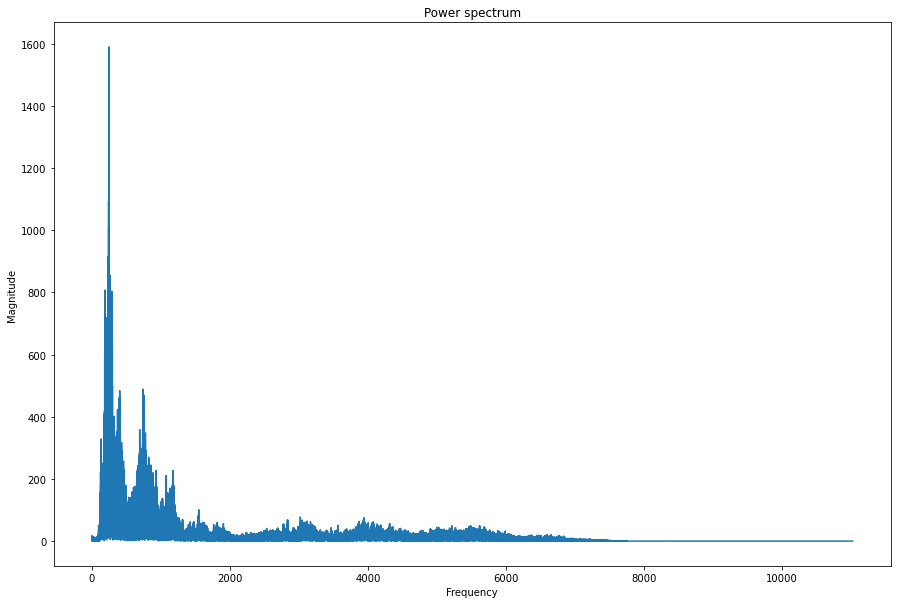

In [17]:
fft = np.fft.fft(sig)

# 복소공간 값 절댓갑 취해서, magnitude 구하기
magnitude = np.abs(fft) 

# Frequency 값 만들기
f = np.linspace(0,sr,len(magnitude))

# 푸리에 변환을 통과한 specturm은 대칭구조로 나와서 high frequency 부분 절반을 날려고 앞쪽 절반만 사용한다.
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]

plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

Text(0.5, 1.0, 'Spectrogram (dB)')

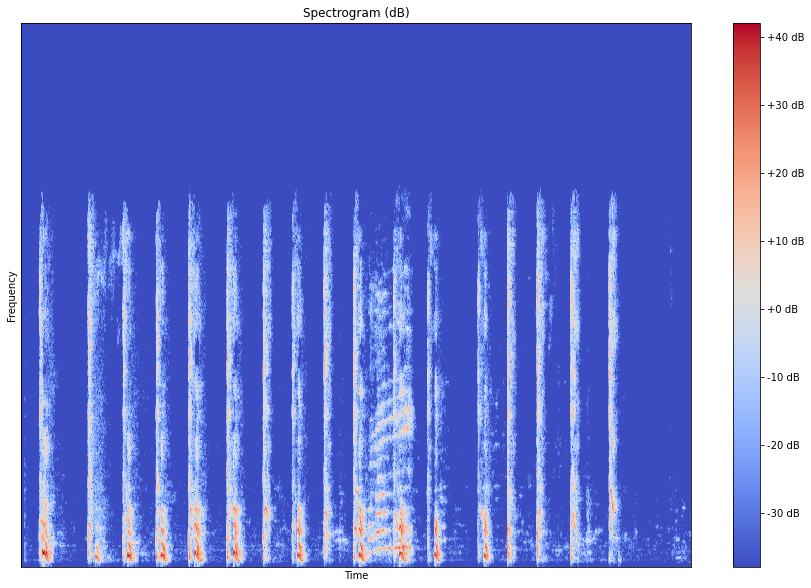

In [19]:
# STFT -> spectrogram
hop_length = 256  # 전체 frame 수
n_fft = 1024  # frame 하나당 sample 수

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sr
n_fft_duration = float(n_fft)/sr

# STFT
stft = librosa.stft(sig, n_fft=n_fft, hop_length=hop_length)

# 복소공간 값 절댓값 취하기
magnitude = np.abs(stft)

# magnitude > Decibels 
log_spectrogram = librosa.amplitude_to_db(magnitude)

# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

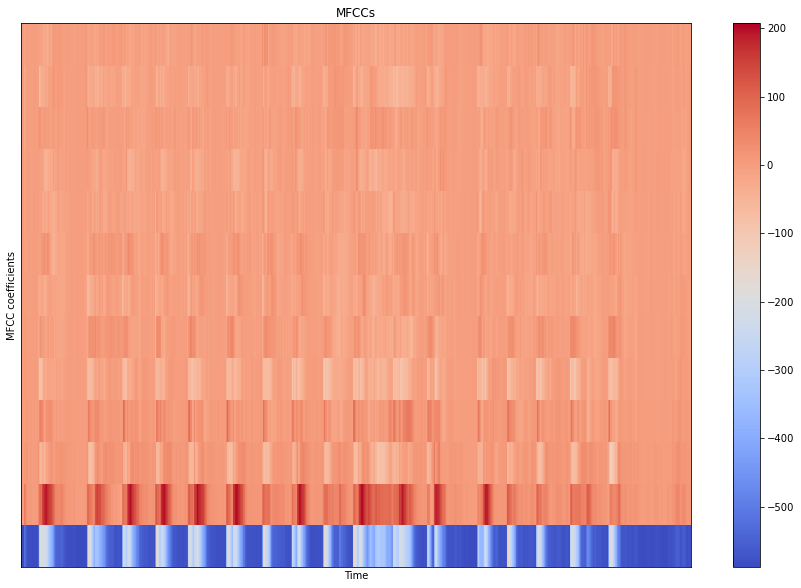

[[-5.87779663e+02 -5.87779663e+02 -5.87779663e+02 ... -5.78311279e+02
  -5.77408203e+02 -5.76203613e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.21232805e+01
   1.28279991e+01  1.39040165e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  8.71633339e+00
   7.99400043e+00  7.59141397e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.90373421e+00
   6.70309353e+00  5.76616144e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.71331167e+00
   5.76752377e+00  5.01378632e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  4.10913169e-01
   2.65799809e+00  2.57267427e+00]]


In [24]:
MFCCs = librosa.feature.mfcc(sig, sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

plt.show()
print(MFCCs)